In [58]:
%pylab inline
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

Populating the interactive namespace from numpy and matplotlib


In [49]:
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file('data/mpg_scale')
X = X.toarray()
print(X.shape)

(392, 7)


In [50]:
from sklearn.preprocessing import PolynomialFeatures
X2 = PolynomialFeatures(2).fit_transform(X)
d = X2.shape[1]

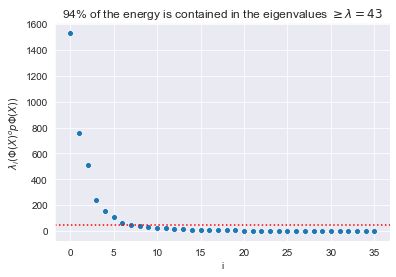

In [76]:
lamda = 43

eigs = np.linalg.eigvals(X2.T.dot(X2))

ax = sns.scatterplot(data=eigs)
ax.set(xlabel='i',
       ylabel='$\lambda_i(\Phi(X)^\top \Phi(X))$',
   title='94% of the energy is contained in the eigenvalues $\geq \lambda = 43$')
ax.axhline(lamda, ls=':', c='r')

ax.figure.savefig('Figures/screeplot.pdf')

In [72]:
sum(eigs[eigs >= lamda]) / sum(eigs)

0.9477413866380759

In [52]:
d_lam = np.trace(
    X2.T.dot(X2).dot(np.linalg.inv(X2.T.dot(X2) + lamda*np.eye(d)))
)
print(d, d_lam)

36 9.35920150041254
